# Stock Market Prediction

#Introduction 

To build the stock price prediction model, we will use the NSE TATA GLOBAL dataset. This is a dataset of Tata Beverages from Tata Global Beverages Limited, National Stock Exchange of India: Tata Global Dataset.

In [1]:
#Import Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [2]:
#Load the data
stock=pd.read_csv(r'C:\Users\dell\Downloads\NSE-Tata-Global-Beverages-Limited.csv')

In [3]:
stock

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05
...,...,...,...,...,...,...,...,...
1230,2013-10-14,160.85,161.45,157.70,159.30,159.45,1281419.0,2039.09
1231,2013-10-11,161.15,163.45,159.00,159.80,160.05,1880046.0,3030.76
1232,2013-10-10,156.00,160.80,155.85,160.30,160.15,3124853.0,4978.80
1233,2013-10-09,155.70,158.20,154.15,155.30,155.55,2049580.0,3204.49


In [4]:
#Information about the dataset
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1235 non-null   object 
 1   Open                  1235 non-null   float64
 2   High                  1235 non-null   float64
 3   Low                   1235 non-null   float64
 4   Last                  1235 non-null   float64
 5   Close                 1235 non-null   float64
 6   Total Trade Quantity  1235 non-null   float64
 7   Turnover (Lacs)       1235 non-null   float64
dtypes: float64(7), object(1)
memory usage: 77.3+ KB


In [5]:
#Describe about the dataset
stock.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03,1235.000000
mean,168.954858,171.429069,166.402308,168.736356,168.731053,2.604151e+06,4843.166502
std,51.499145,52.436761,50.542919,51.587384,51.544928,2.277028e+06,5348.919832
min,103.000000,104.600000,100.000000,102.600000,102.650000,1.001800e+05,128.040000
25%,137.550000,138.925000,135.250000,137.175000,137.225000,1.284482e+06,1801.035000
50%,151.500000,153.250000,149.500000,151.200000,151.100000,1.964885e+06,3068.510000
75%,169.000000,172.325000,166.700000,169.100000,169.500000,3.095788e+06,5852.600000
max,327.700000,328.750000,321.650000,325.950000,325.750000,2.919102e+07,55755.080000


In [6]:
#Shape 
stock.shape

(1235, 8)

In [7]:
#Data types
stock.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity    float64
Turnover (Lacs)         float64
dtype: object

# EDA

In [8]:
stock.rolling(7).mean().head(10)

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,225.950000,230.500000,219.571429,223.935714,224.007143,3.040937e+06,6822.042857
7,230.521429,233.035714,223.235714,226.650000,226.735714,2.697903e+06,6134.295714
8,232.850000,235.628571,226.964286,230.364286,230.578571,2.530739e+06,5862.415714
9,234.285714,237.257143,229.050000,232.757143,232.735714,2.772843e+06,6460.095714


<AxesSubplot:>

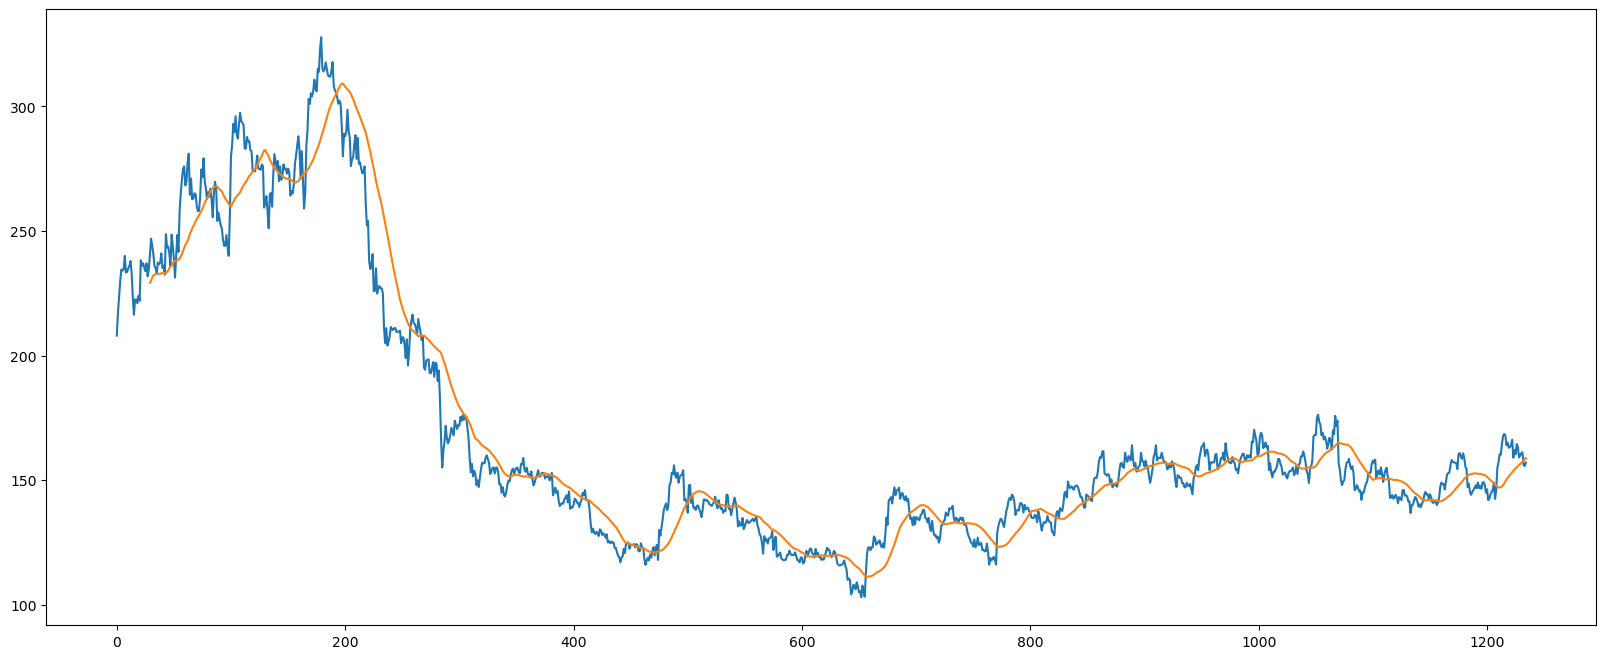

In [9]:
#stock['Open'].plot(figsize=(20,8),alpha = 1)
#stock.rolling(window=30).mean()['Close'].plot(alpha = 1)

<AxesSubplot:>

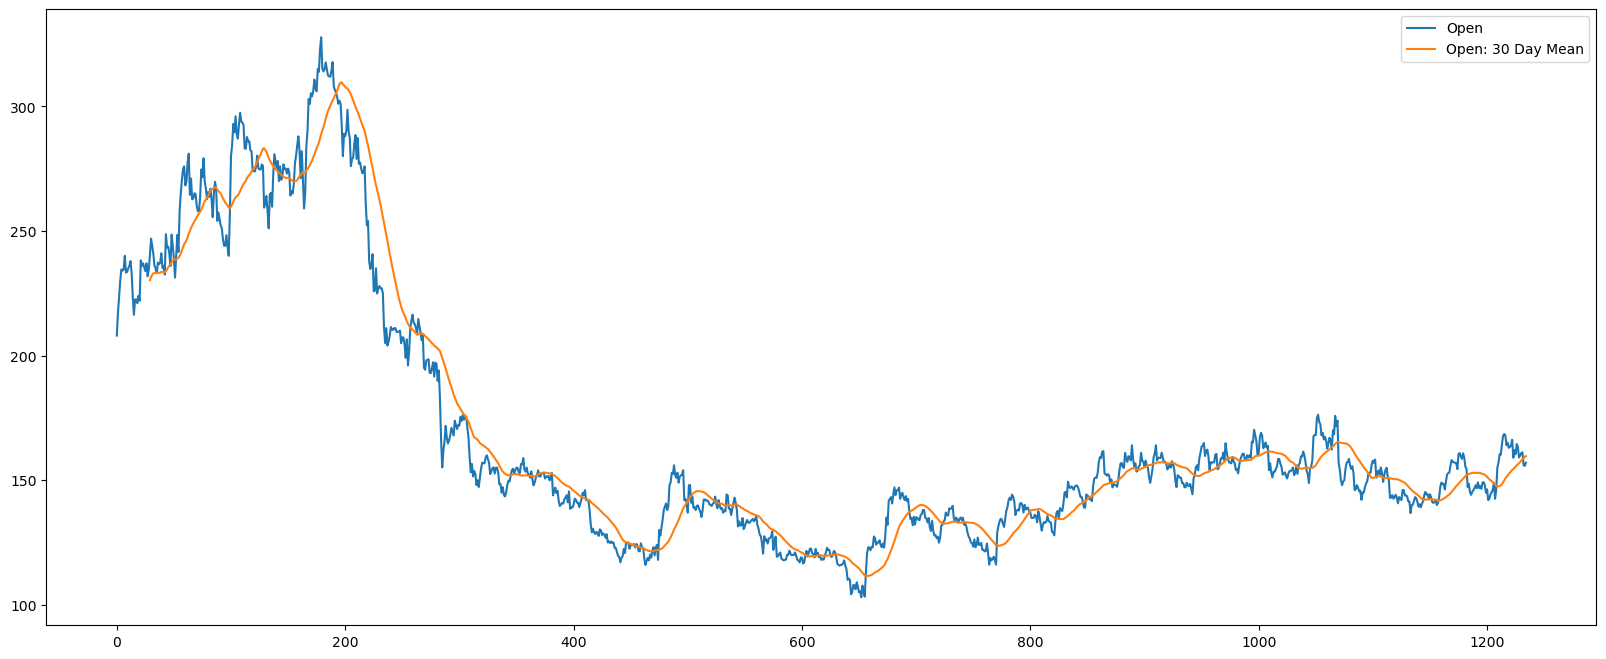

In [41]:
stock['Open: 30 Day Mean'] = stock['Open'].rolling(window=30).mean()
stock[['Open','Open: 30 Day Mean']].plot(figsize=(20,8),alpha = 1)

<AxesSubplot:>

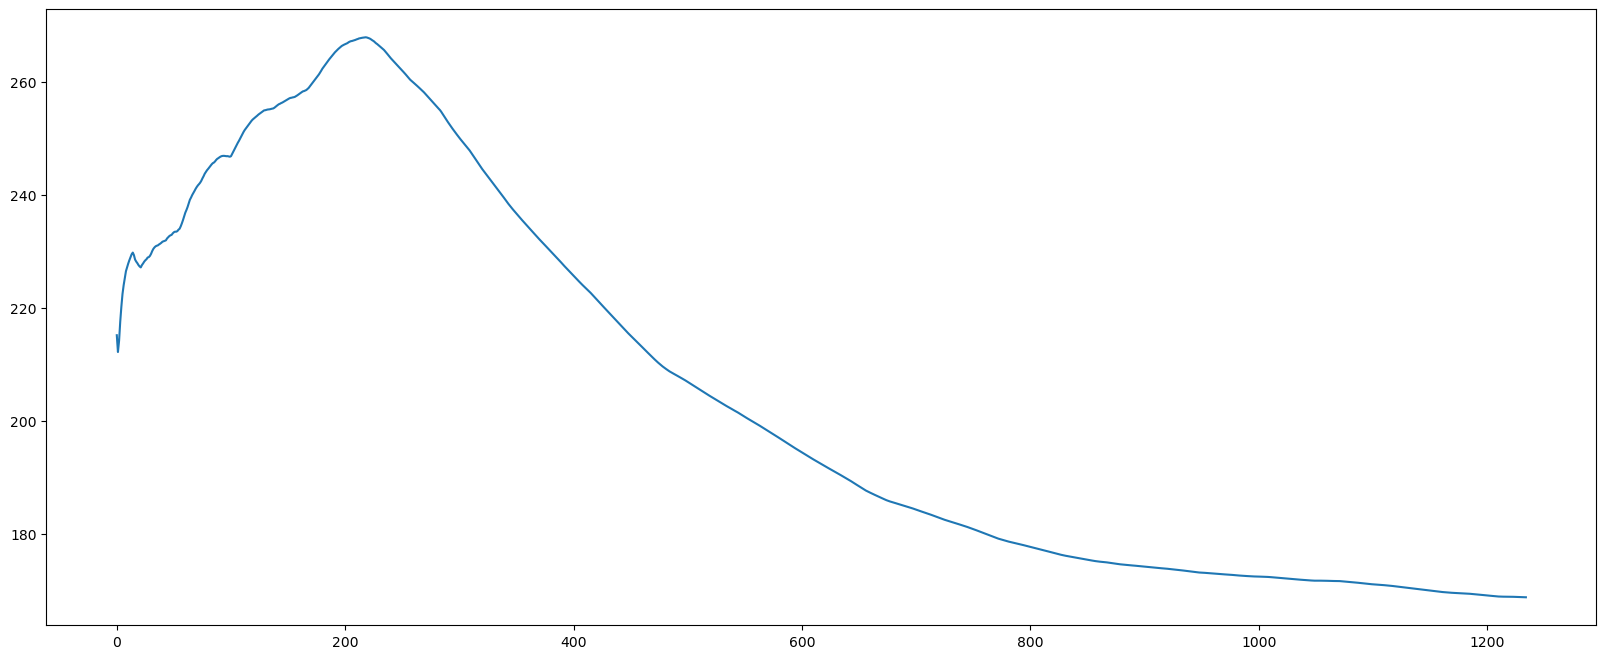

In [11]:
stock['Close'].expanding(min_periods=1).mean().plot(figsize=(20,8),alpha = 1)

In [12]:
stock_new=stock.reset_index()['Open']
stock_new

0       208.00
1       217.00
2       223.50
3       230.00
4       234.55
         ...  
1230    160.85
1231    161.15
1232    156.00
1233    155.70
1234    157.00
Name: Open, Length: 1235, dtype: float64

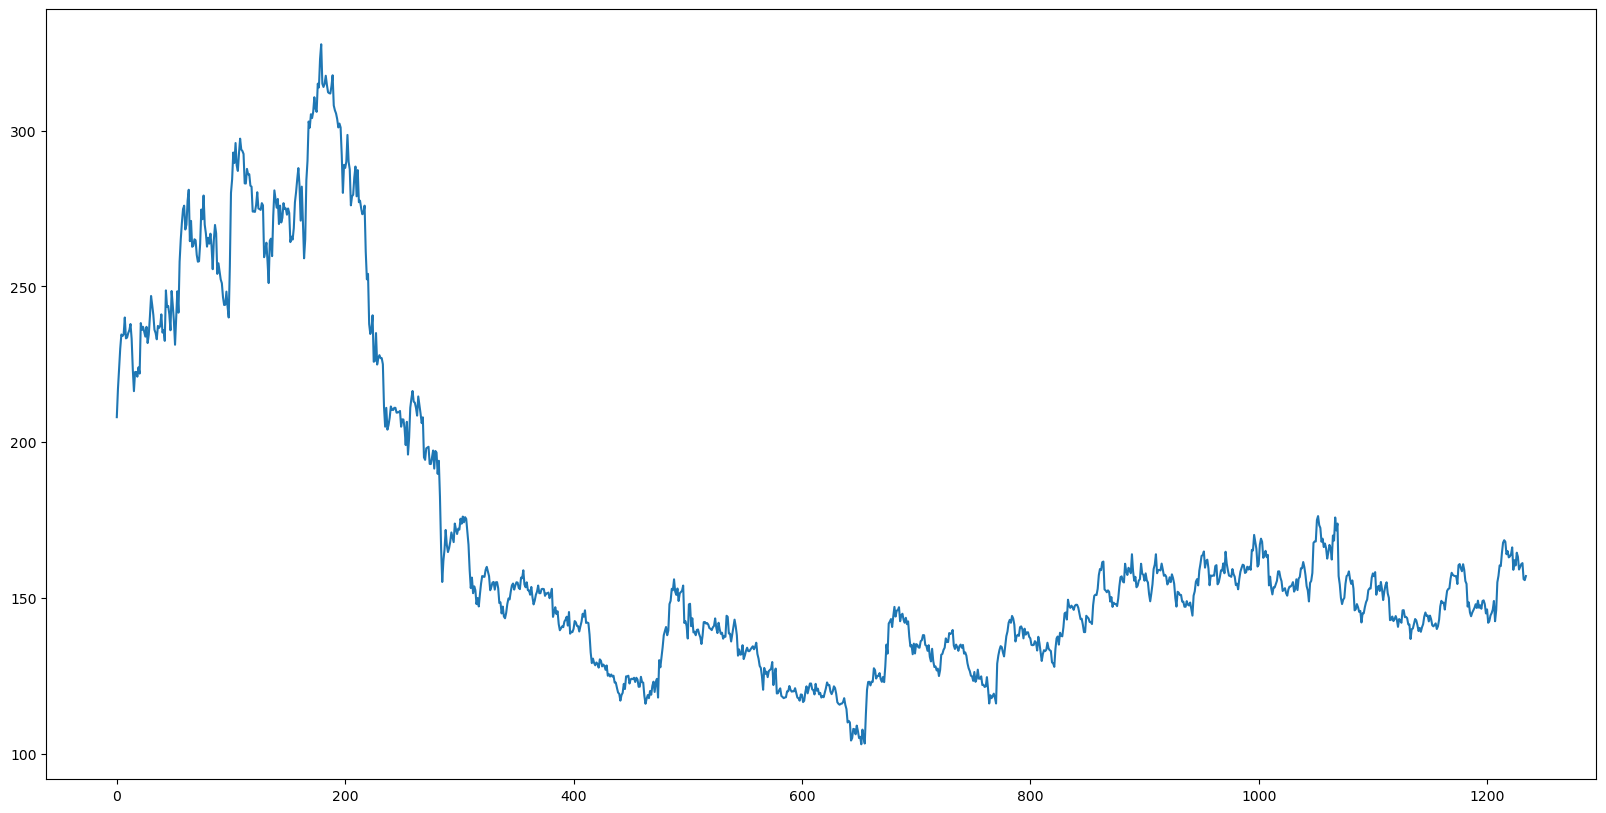

In [13]:
plt.plot(stock_new)

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
stock_new=scaler.fit_transform(np.array(stock_new).reshape(-1,1))
print(stock_new)

[[0.46728972]
 [0.50734312]
 [0.53627058]
 ...
 [0.23587005]
 [0.23453494]
 [0.24032043]]


In [15]:
stock.isnull().sum()

Date                     0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
Total Trade Quantity     0
Turnover (Lacs)          0
Open: 30 Day Mean       29
dtype: int64

In [16]:
# Check for duplicates
print(stock.duplicated().sum())


0


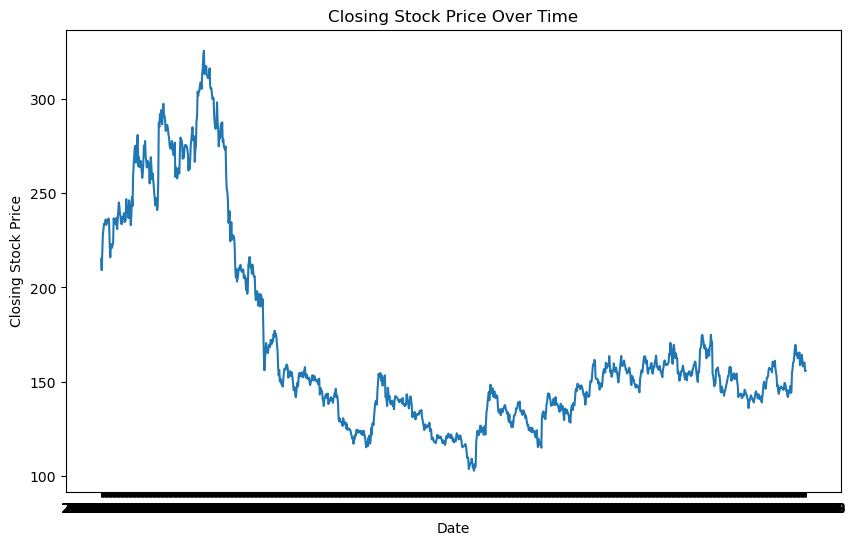

In [17]:
# Line chart of closing stock price over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Close', data=stock)
plt.title('Closing Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Stock Price')
plt.show()

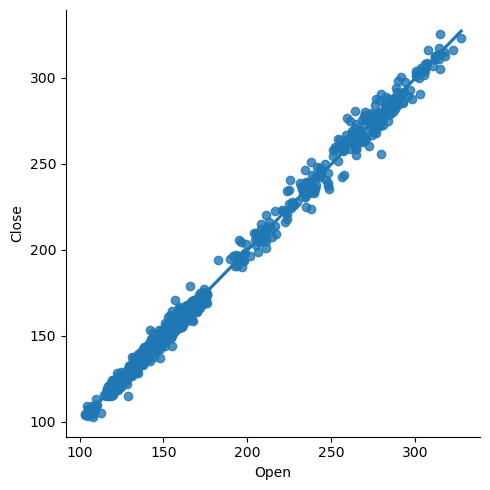

In [18]:
#Line Plot 
sns.lmplot(x='Open', y='Close', data=stock)

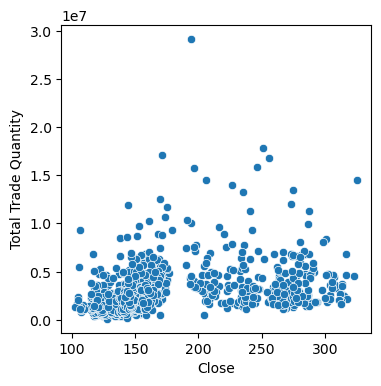

In [19]:
# Scatter Plot
plt.figure(figsize=(4,4))
sns.scatterplot(data = stock, x = stock['Close'], y = stock['Total Trade Quantity'])
plt.show()

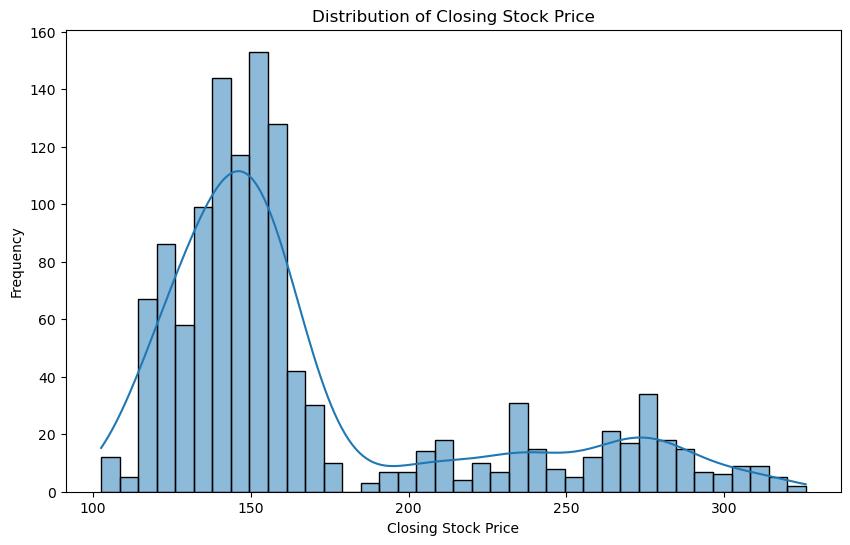

In [20]:
#Histogram
plt.figure(figsize=(10, 6))
sns.histplot(stock['Close'], kde=True)
plt.title('Distribution of Closing Stock Price')
plt.xlabel('Closing Stock Price')
plt.ylabel('Frequency')
plt.show()

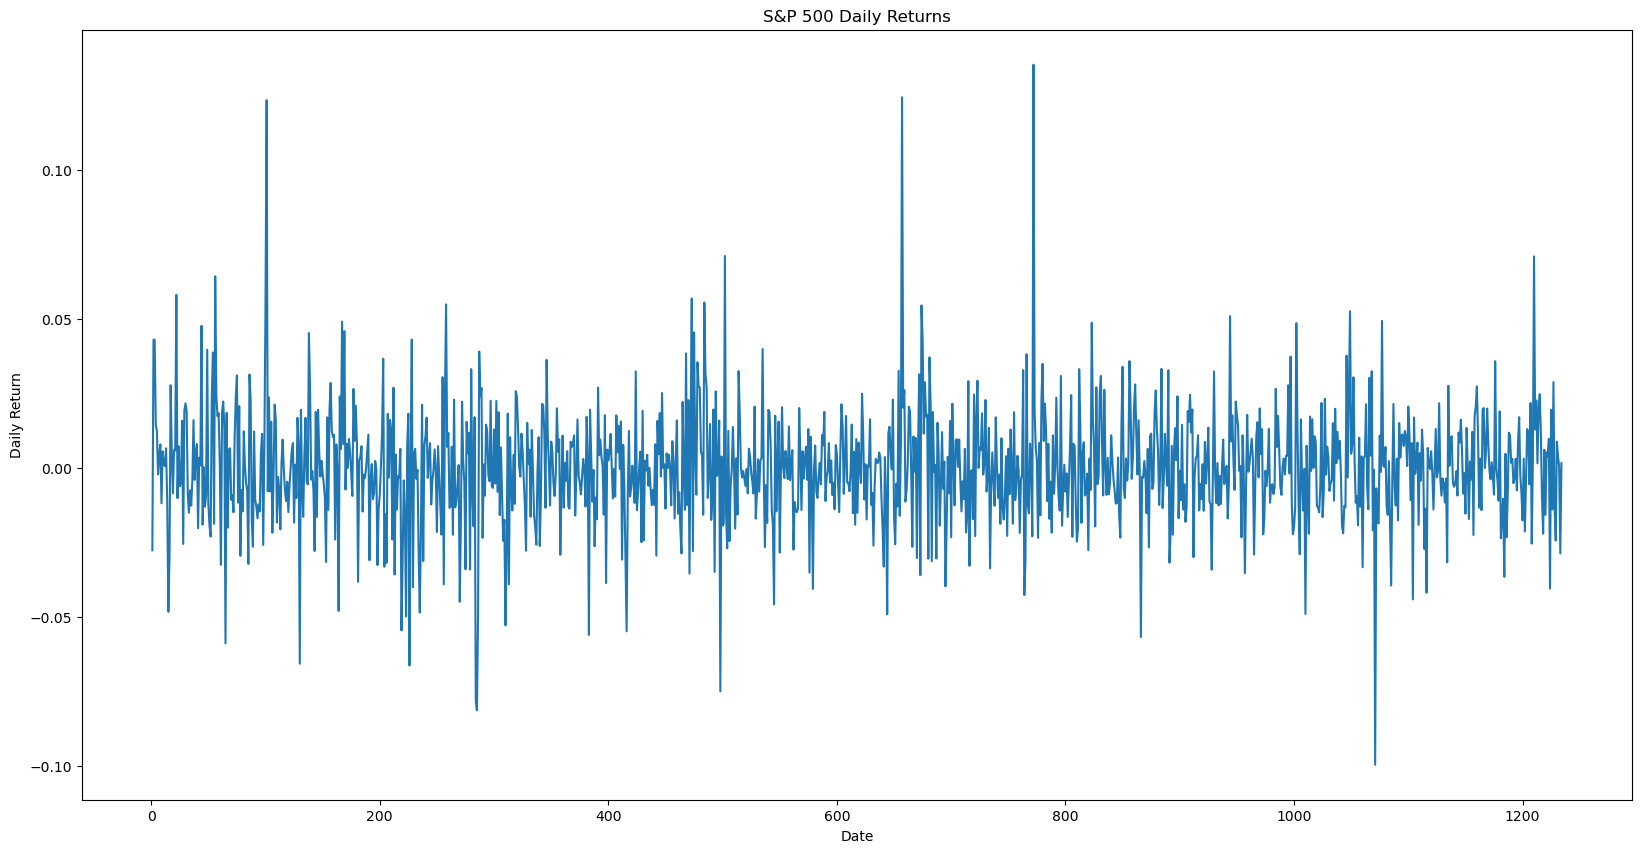

In [21]:
daily_returns = stock['Close'].pct_change()

# Create a line chart of the daily returns
plt.plot(daily_returns.index, daily_returns.values)
plt.title('S&P 500 Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.show()
#This will create a line chart showing the daily returns over time.


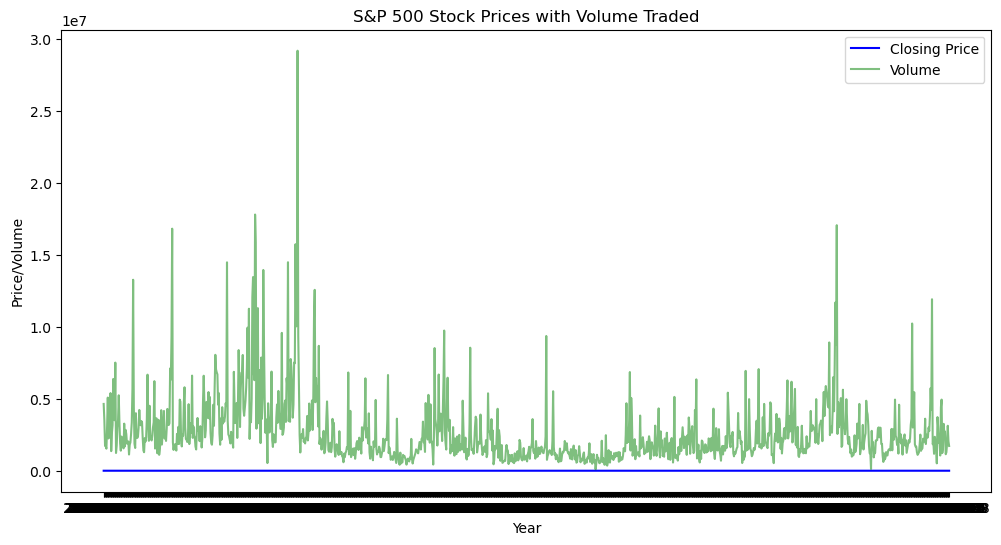

In [22]:
# Create a combination plot of stock prices and volume traded
plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='Close', data=stock, color='b')
sns.lineplot(x='Date', y='Total Trade Quantity', data=stock, color='g', alpha=0.5)
plt.title('S&P 500 Stock Prices with Volume Traded')
plt.xlabel('Year')
plt.ylabel('Price/Volume')
plt.legend(['Closing Price', 'Volume'])
plt.show()

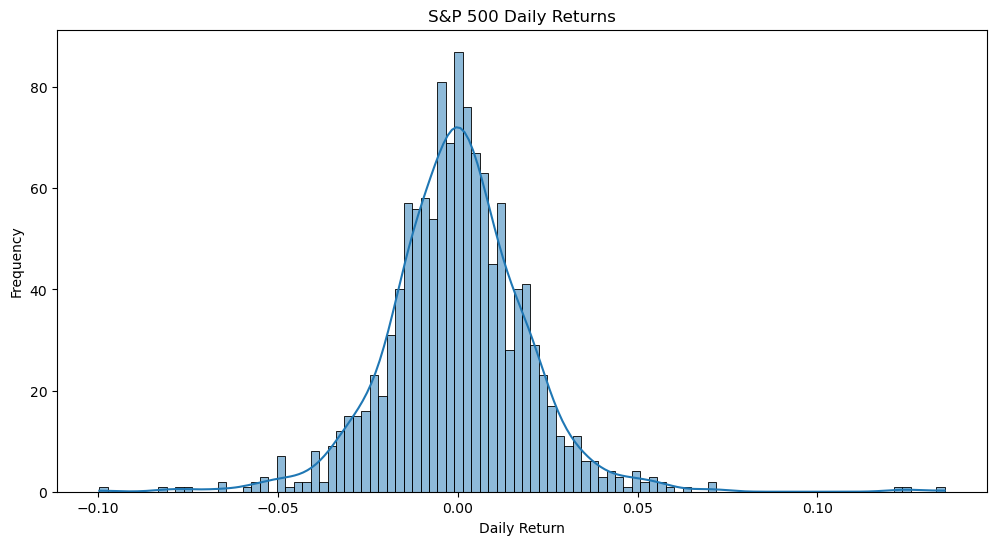

In [23]:
# Create a histogram of the daily returns
plt.figure(figsize=(12,6))
sns.histplot(stock['Close'].pct_change().dropna(), bins=100, kde=True)
plt.title('S&P 500 Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

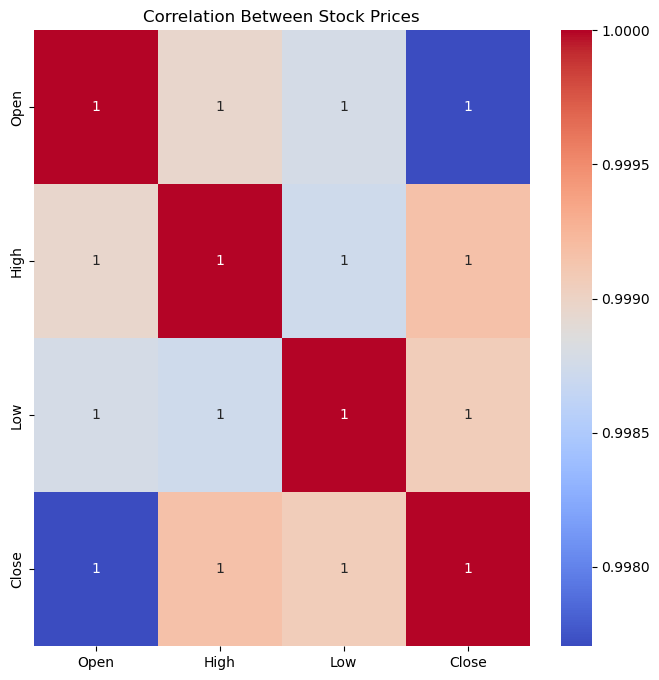

In [24]:
# Create a heatmap of the correlation between stock prices
corr = stock[['Open', 'High', 'Low', 'Close']].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Stock Prices')
plt.show()

#Buildng the Model using RNN

In [25]:
training_set = stock.iloc[:, 1:2].values

In [26]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [27]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1235):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [28]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [29]:
# Building the RNN
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [30]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [31]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [32]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [33]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [34]:
# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
37/37 [==============================] - 16s 146ms/step - loss: 0.0222
Epoch 2/50
37/37 [==============================] - 5s 130ms/step - loss: 0.0052
Epoch 3/50
37/37 [==============================] - 4s 115ms/step - loss: 0.0040
Epoch 4/50
37/37 [==============================] - 6s 153ms/step - loss: 0.0055
Epoch 5/50
37/37 [==============================] - 5s 125ms/step - loss: 0.0038
Epoch 6/50
37/37 [==============================] - 4s 104ms/step - loss: 0.0045
Epoch 7/50
37/37 [==============================] - 4s 103ms/step - loss: 0.0036
Epoch 8/50
37/37 [==============================] - 4s 103ms/step - loss: 0.0031
Epoch 9/50
37/37 [==============================] - 4s 102ms/step - loss: 0.0030
Epoch 10/50
37/37 [==============================] - 4s 103ms/step - loss: 0.0032
Epoch 11/50
37/37 [==============================] - 4s 105ms/step - loss: 0.0030
Epoch 12/50
37/37 [==============================] - 4s 102ms/step - loss: 0.0035
Epoch 13/50
37/37 [=====

In [35]:
# Making the predictions and visualising the results
# Getting the real stock price of 2017
dataset_test = pd.read_csv(r'C:\Users\dell\Downloads\tatatest.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [36]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((stock['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


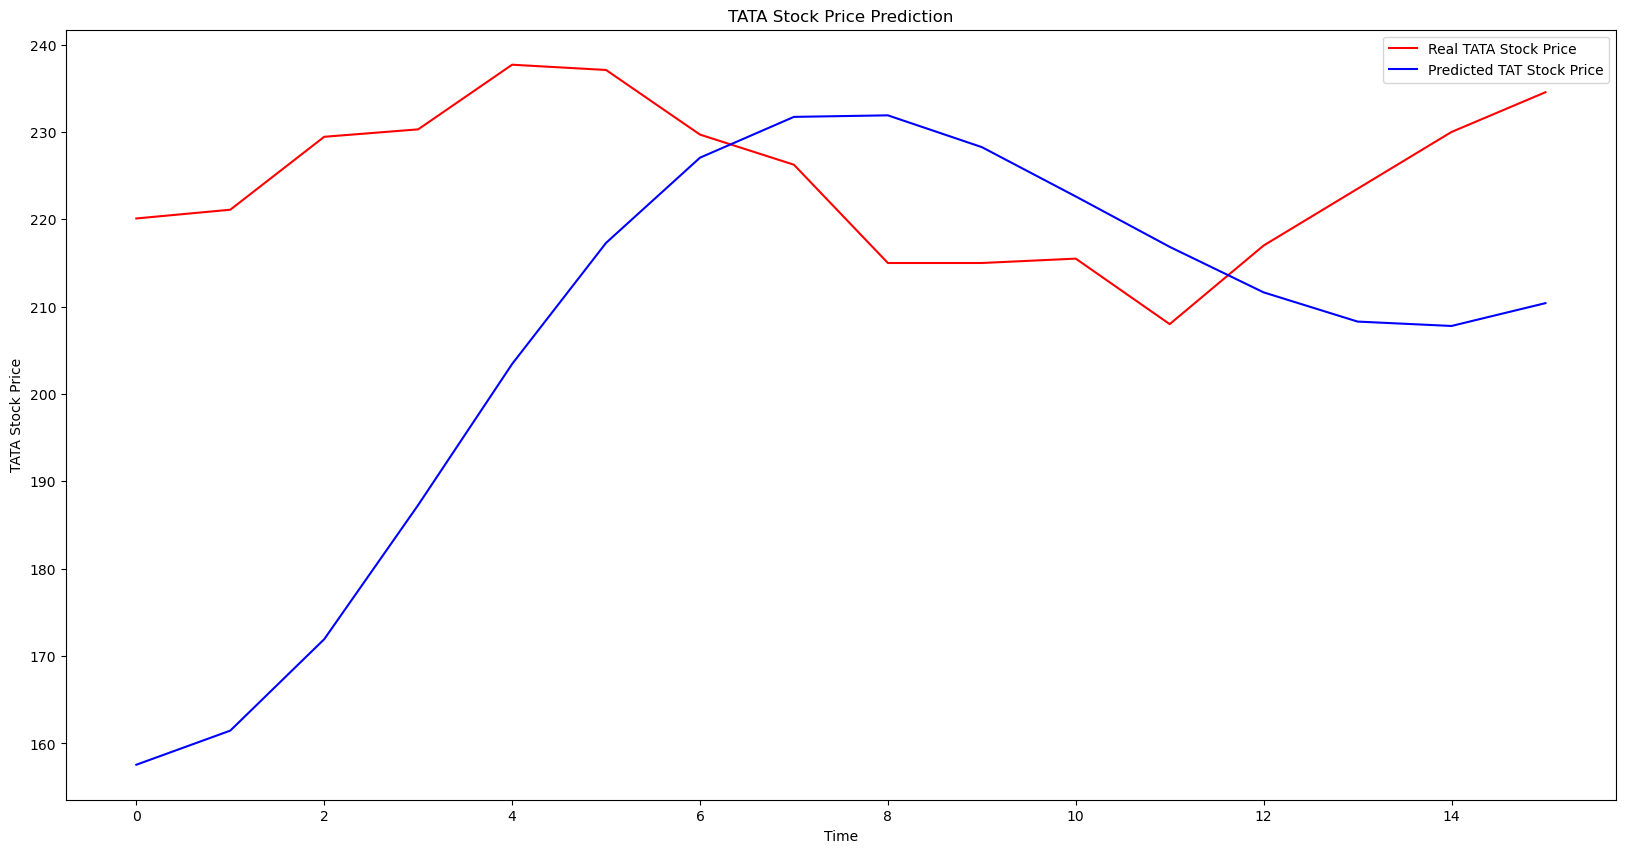

In [37]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real TATA Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted TAT Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()

# Saving the model

In [38]:
import pickle

In [39]:
filename = "regressor.pkl"
pickle.dump(regressor, open(filename, 'wb'))
print("Saved the Model")

Saved the Model
